# Derivative of a GP

*You are seeing the
notebook output generated by
[Literate.jl](https://github.com/fredrikekre/Literate.jl) from the
[Julia source file](https://github.com/Crown421/GPDiffEq.jl/blob/main/examples/derivativegp/script.jl).
The rendered HTML can be viewed [in the docs](https://juliagaussianprocesses.github.io/AbstractGPs.jl/dev/examples/derivativegp/).*

The derivative of a GP is also a GP, as differentiation is a linear operators. In this example, we show how to use of the `DerivativeGP` and how to easily generate it from a known GP.

## Setup

In [1]:
using GPDiffEq
using Plots

## The toy model
We generate data for our model

In [2]:
σ_n = 3e-2
x = collect(range(-3, 3; length=10))
y = sin.(x) + σ_n * randn(length(x))

10-element Vector{Float64}:
 -0.12832091899926382
 -0.7600590969633476
 -1.040822758092499
 -0.8308430379023423
 -0.3007714486834641
  0.37056523188398416
  0.858839026669002
  0.9394934615533654
  0.7507153288160759
  0.15680598224823455

which looks as follows

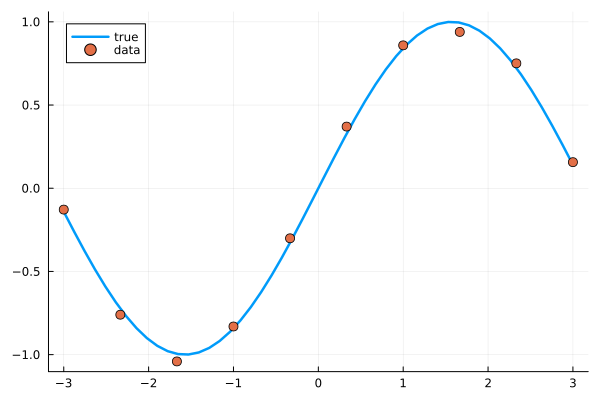

In [3]:
x_plot = collect(range(-3, 3; length=50))

plot(x_plot, sin.(x_plot); label="true", linewidth=2.5)
scatter!(x, y; label="data", markersize=5)
plot!(; legend=:topleft) #hide

# Define a GP

We'll use a simple GP with a `ZeroMean` and `GaussianKernel`, condition it on our data

In [4]:
kernel = GaussianKernel()
f = GP(kernel)
fx = f(x, σ_n^2)

f_post = posterior(fx, y)

AbstractGPs.PosteriorGP{AbstractGPs.GP{AbstractGPs.ZeroMean{Float64}, KernelFunctions.SqExponentialKernel{Distances.Euclidean}}, NamedTuple{(:α, :C, :x, :δ), Tuple{Vector{Float64}, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}, Vector{Float64}, Vector{Float64}}}}(AbstractGPs.GP{AbstractGPs.ZeroMean{Float64}, KernelFunctions.SqExponentialKernel{Distances.Euclidean}}(AbstractGPs.ZeroMean{Float64}(), Squared Exponential Kernel (metric = Distances.Euclidean(0.0))), (α = [1.2728073739628227, -1.9657986650159094, 0.8845118049526444, -1.8210227487547, 2.417230080577002, -4.283592918907248, 6.735868450646537, -6.602329801087305, 5.9039482744824845, -2.6520073327365425], C = LinearAlgebra.Cholesky{Float64, Matrix{Float64}}([1.0004498987955368 0.8003773141272065 … 6.655367228157499e-7 1.5223130876467006e-8; 0.8007374029168073 0.6002467451228027 … 3.0207225222272073e-5 1.0889719997540142e-6; … ; 6.658361469857302e-7 1.8664469113520537e-5 … 0.34828354141123175 0.6956902200185068; 1.522997974471

and plot the posterior. Note that this GP completely untrained, no hyperparameters have been defined.

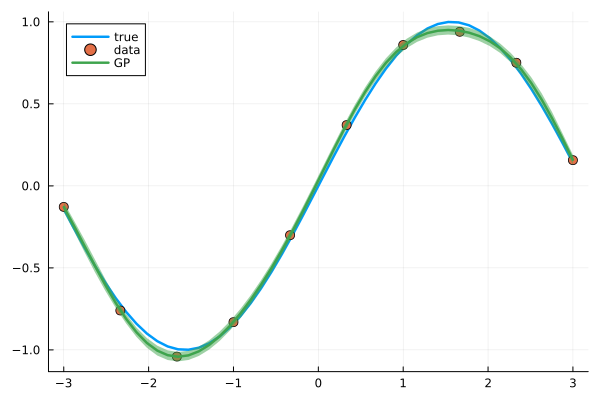

In [5]:
plot(x_plot, sin.(x_plot); label="true", linewidth=2.5)
scatter!(x, y; label="data", markersize=5)
plot!(
    x_plot,
    mean(f_post, x_plot);
    ribbons=sqrt.(var(f_post, x_plot)),
    label="GP",
    linewidth=2.5,
)
plot!(; legend=:topleft) #hide

## Derivative of a GP
Now we can very easily generate the derivate of this GP

In [6]:
df_post = differentiate(f_post)

AbstractGPs.PosteriorGP{GPDiffEq.DerivativeGP{AbstractGPs.GP{AbstractGPs.ZeroMean{Float64}, KernelFunctions.SqExponentialKernel{Distances.Euclidean}}, AbstractGPs.ZeroMean{Float64}, GPDiffEq.DerivativeKernelCollection{KernelFunctions.SqExponentialKernel{Distances.Euclidean}, GPDiffEq.FirstComponentDerivativeKernel{GPDiffEq.var"#d10#12"{KernelFunctions.SqExponentialKernel{Distances.Euclidean}}, KernelFunctions.SqExponentialKernel{Distances.Euclidean}}, GPDiffEq.SecondComponentDerivativeKernel{GPDiffEq.var"#d01#15"{KernelFunctions.SqExponentialKernel{Distances.Euclidean}}, KernelFunctions.SqExponentialKernel{Distances.Euclidean}}, GPDiffEq.BothComponentDerivativeKernel{GPDiffEq.var"#d11#18"{KernelFunctions.SqExponentialKernel{Distances.Euclidean}}, KernelFunctions.SqExponentialKernel{Distances.Euclidean}}}}, NamedTuple{(:α, :C, :x, :δ), Tuple{Vector{Float64}, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}, Vector{Float64}, Vector{Float64}}}}(GPDiffEq.DerivativeGP{AbstractGPs.GP{Abstrac

and plot the new posterior. As we know, the derivative of `sin` is `cos`, so we can check the differentiated GP.

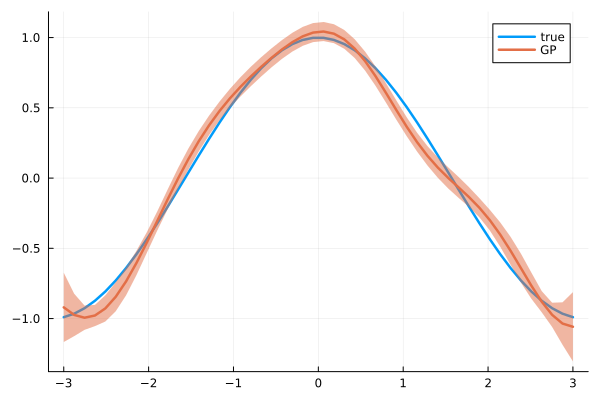

In [7]:
plot(x_plot, cos.(x_plot); label="true", linewidth=2.5)
plot!(
    x_plot,
    mean(df_post, x_plot);
    ribbons=sqrt.(var(df_post, x_plot)),
    label="GP",
    linewidth=2.5,
)

As we saw above, the original GP was slighly off from the true function. This is reflected and amplified in the derivative as well.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*